# Kelompok 1 - Data Whiz
Data: Banking Datasets - Target Marketing
[kaggle link](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets)

# ***Dataset Preparation***

## ***Import Library***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ***Load Dataset***

In [ ]:
df = pd.read_csv('train.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# ***Descriptive Statistics***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Informasi terkait dataset
* dataset memiliki 45211 baris dan 17 kolom. setiap kolom tidak memiliki data yang null.
* tidak ada data yang hilang.
* terdapat 2 buah tipe data: numerikal dan kategorikal.

In [ ]:
num = ['age','balance','day','duration','campaign','pdays','previous']
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

### Analisa kasus data numerikal

In [ ]:
# Data numerik
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Deskripsi Data Numerik
* age:
> * rentang umur berada di angka 18 - 95 tahun, sebaran dari umur bersifat normal.
>
* balance:
> * <b>terdapat balance yang bernilai negatif (tidak normal).</b>
> * harus ada treatment untuk yang nilainya negatif: (opsi: hapus, ganti dengan data mean, median, mode, atau dibuat nol).
* day:
> * berupa tanggal kontak terakhir dalam suatu bulan, tidak ada tanggal yang bersifat anomali .
* duration:
> * lamanya durasi pemanggilan (dalam detik).
> * ada yang bernilai nol, (bisa diartikan memang tidak diangkat).
* campaign:
> * banyaknya kontak yang dilakukan terhadap clients.
> * nilai maksimal hingga 63, bernilai sangat jauh bahkan terhadap Q3. dapat diprediksi bahwa terdapat banyak outlier.
* pdays:
> * lamanya waktu (dalam hari) terakhir kali client ini dihubungi.
> * nilai -1 artinya contact belum pernah dihubungi sebelumnya.
> * <b>kebanyakan data bernilai -1, artinya banyak orang yang baru dihubungi pertama kali (di atas 75%)</b>.
* previous:
> * banyaknya kontak terdahulu yang sudah dilakukan sebelum adanya pemanggilan yang saat ini.
> * <b> diverifikasi bahwa data di atas 75% data bernilai 0, artinya di atasr 75% client pada dataset baru pertama kali dihubungi.</b>

In [ ]:
# Data kategorik
df[cat].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


# Deskripsi dari data kategorikal
* dengan mengecualikan bulan, kolom `job` memiliki ragam kategori yang lebih banyak dibandingkan kolom yang lain.

In [ ]:
# Melihat uniqe value count setiap fitur
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [ ]:
# Melihat unique value untuk data kategorik
for col in cat:
    print(f'''Value kolom {col}:''')
    print(df[col].unique())

Value kolom job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Value kolom marital:
['married' 'single' 'divorced']
Value kolom education:
['tertiary' 'secondary' 'unknown' 'primary']
Value kolom default:
['no' 'yes']
Value kolom housing:
['yes' 'no']
Value kolom loan:
['no' 'yes']
Value kolom contact:
['unknown' 'cellular' 'telephone']
Value kolom month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Value kolom poutcome:
['unknown' 'failure' 'other' 'success']
Value kolom y:
['no' 'yes']


# ***Univariate Analysis***

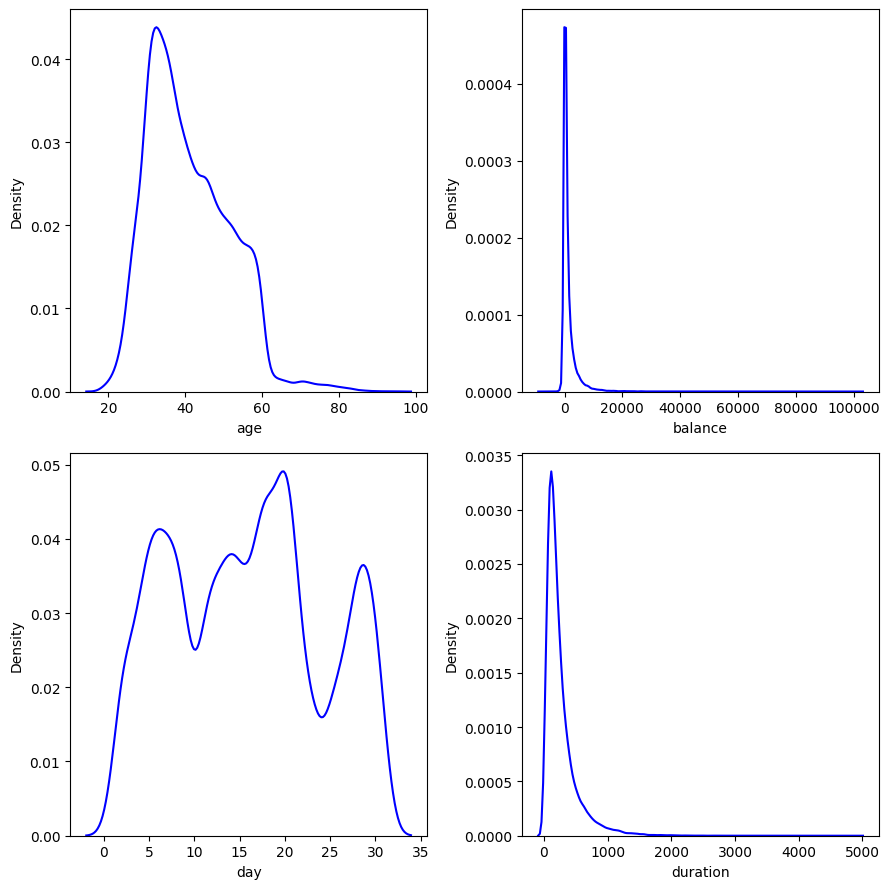

In [ ]:
feature = num[0:4]
plt.figure(figsize=(9, 9))
for i in range (0, len (feature)) :
    plt.subplot (2, 2, i+1)
    sns.kdeplot(x = df[feature[i]], color='blue')
    plt.xlabel(feature[i])
    plt.tight_layout()

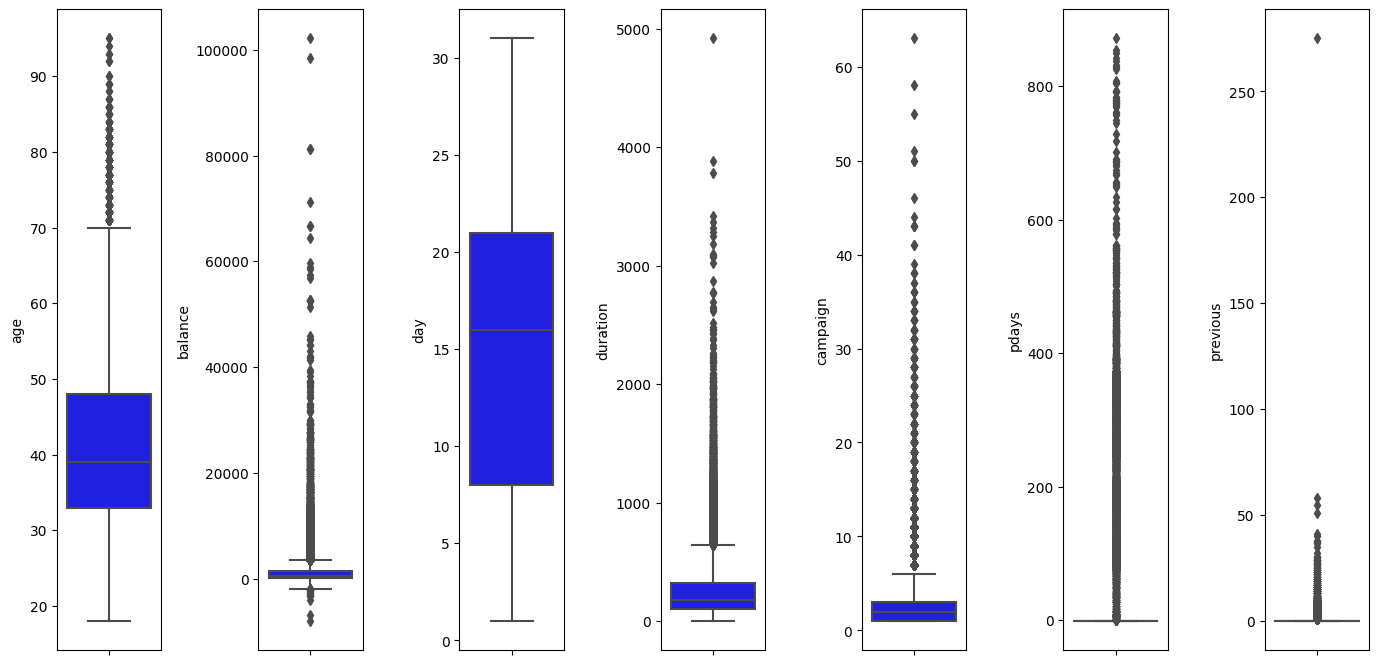

In [ ]:
feature = num
plt.figure(figsize=(14, 7))
for i in range (0, len (feature)) :
    plt.subplot (1, len (feature), i+1)
    plt.tight_layout()
    sns.boxplot (y = df[feature[i]], color = 'blue', orient = 'v')

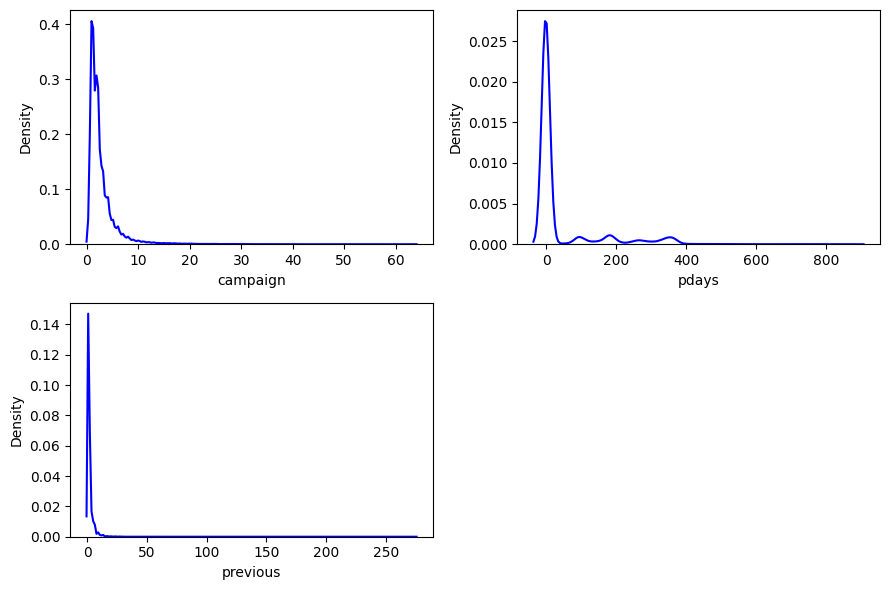

In [ ]:
feature = num[4:7]
plt.figure(figsize=(9, 6))
for i in range (0, len (feature)) :
    plt.subplot (2, 2, i+1)
    sns.kdeplot(x = df[feature[i]], color='blue')
    plt.xlabel(feature[i])
    plt.tight_layout()

<ipython-input-17-4a377e2d2513>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-17-4a377e2d2513>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-17-4a377e2d2513>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-17-4a377e2d2513>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-17-4a377e2d2513>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-17-4a377e2d2513>:5: UserWarning: Tight layout not applied. tight_layout cannot make a

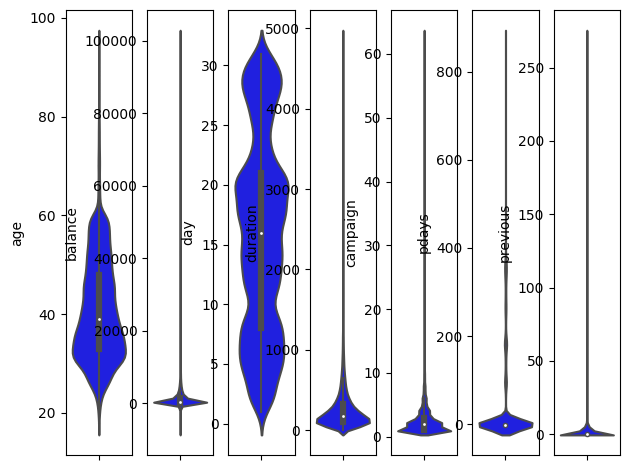

In [ ]:
feature = num
for i in range (0, len (feature)) :
    plt.subplot (1, len (feature), i+1)
    sns.violinplot( y = df[feature[i]], color = 'blue')
    plt.tight_layout()

# Deskripsi hasil univariate analysis (data numerikal)
* kolom day: tidak memiliki outlier namun hal ini tidak memberikan banyak informasi gain
* kebanyakan data memiliki outlier positif, artinya kecenderungan data bersifat menceng ke kanan.
* pdays dan previous memiliki box yang terletak di titik 0. Hal ini akibat dari kebanyakan clients adalah merupakan pemanggilan pertama saja.

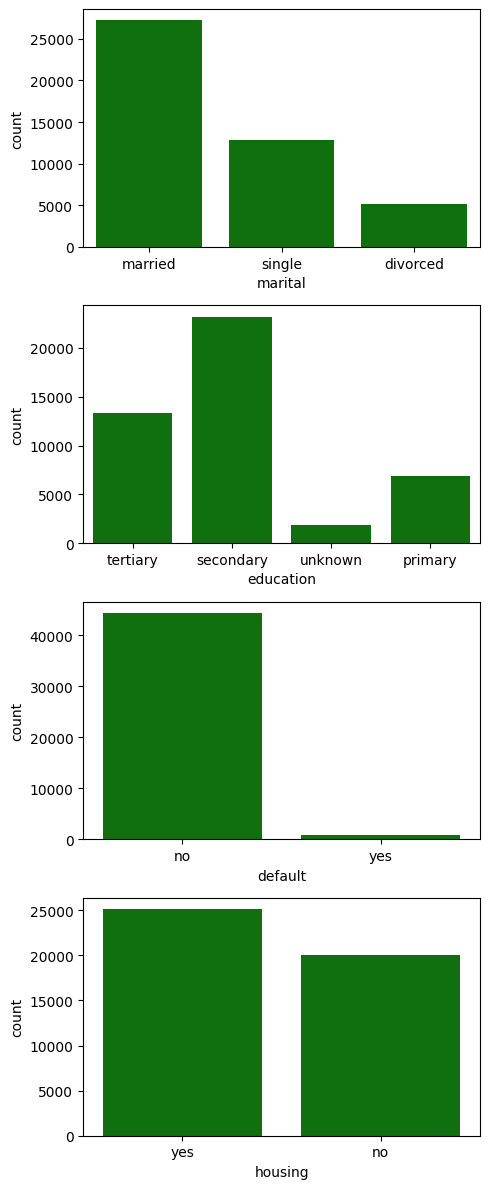

In [ ]:
features = cat[1:5]
plt.figure(figsize=(5, 12))
for i in range (0, len(features)) :
    plt.subplot(4, 1, i+1)
    sns.countplot(x = df[features[i]], color = 'green')
    plt.xticks(rotation=0)
    plt.tight_layout()

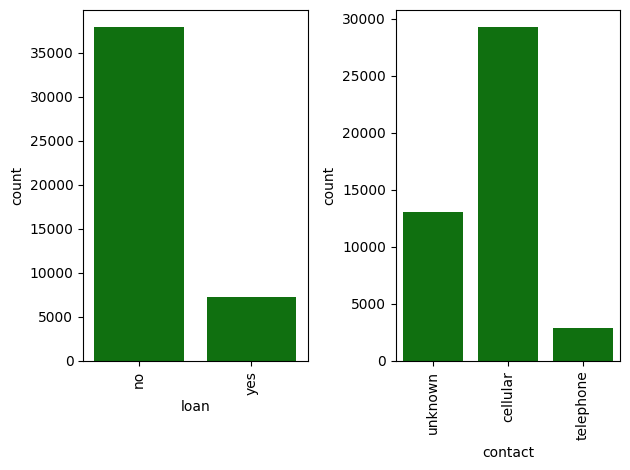

In [ ]:
features = cat[5:7]
for i in range (0, len(features)) :
    plt.subplot(1, len(features), i+1)
    sns.countplot(x = df[features[i]], color = 'green')
    plt.xticks(rotation=90)
    plt.tight_layout()

Dari informasi di atas, diketahui bahwa nasabah yang tidak memiliki hutang lebih cenderung untuk membuka deposito. Sedangkan untuk data yang dimiliki untuk mengubungi nasabah, cara memanfaatkan cellular lebih sering digunakan dibandingkan melalui telepon dan cara lainnya yang tidak diketahui.

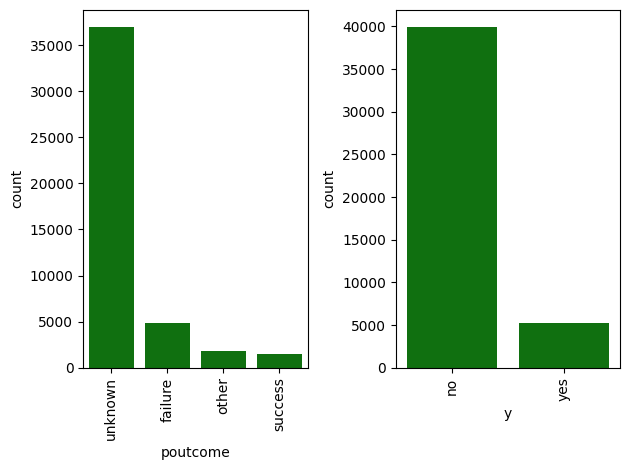

In [ ]:
features = cat[8:10]
for i in range (0, len(features)) :
    plt.subplot(1, len(features), i+1)
    sns.countplot(x = df[features[i]], color = 'green')
    plt.xticks(rotation=90)
    plt.tight_layout()

Data putcome merupakan data yang berkaitan terkait Campaign yang telah dilakukan sebelumnya. Data Unknown diketahui hasil dari respon berupa telepon yang dimatikan atau jaringan yang bermasalah. Others berupa respon-respon lainnya selain gagal atau diterima.  Dari data di atas, diketahui respon unknown paling tinggi dari hasil campaign sebelumnya.

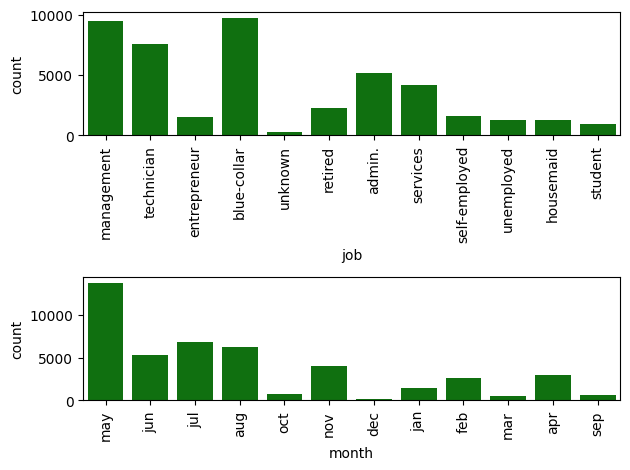

In [ ]:
plt.subplot(2, 1, 1)
sns.countplot(x = df['job'], color = 'green')
plt.xticks(rotation=90)
plt.subplot(2, 1, 2)
sns.countplot(x = df['month'], color = 'green')
plt.xticks(rotation=90)
plt.tight_layout()

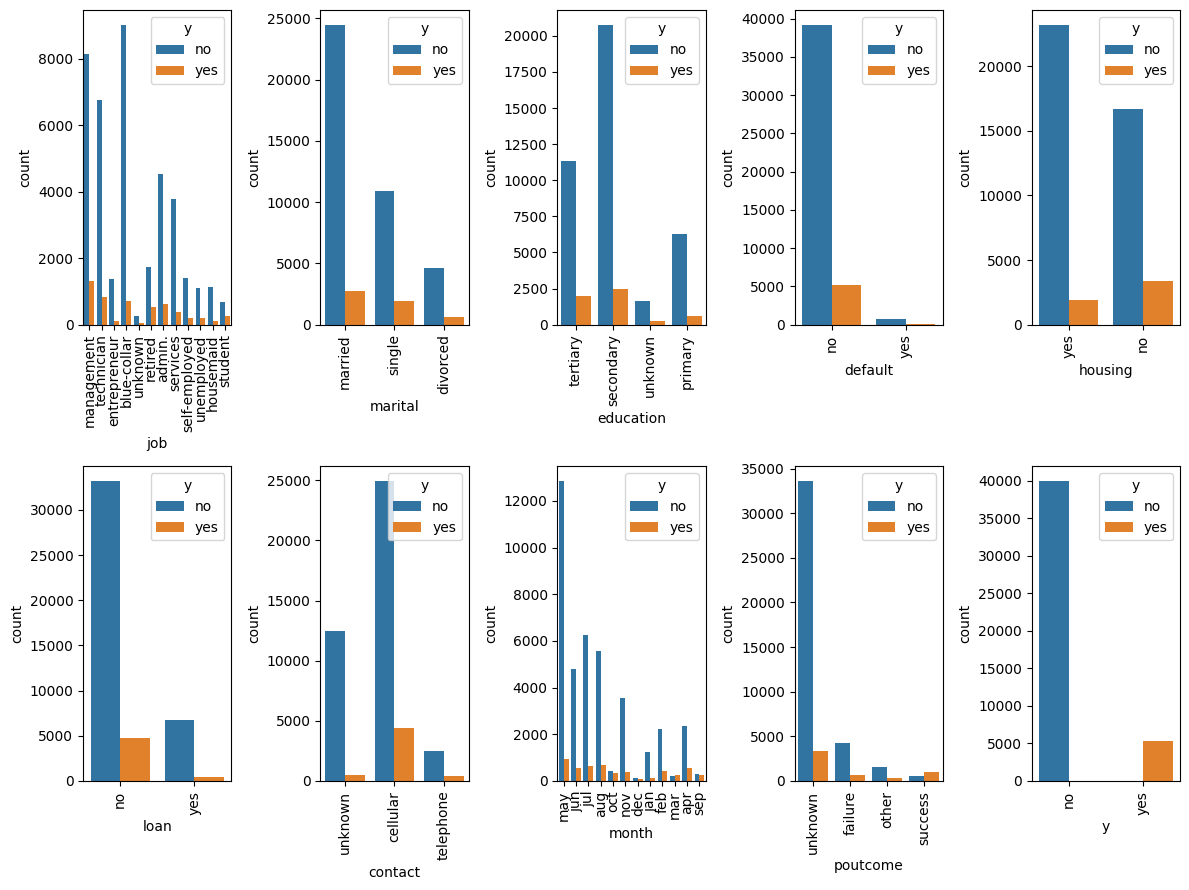

In [ ]:
features = cat
plt.figure(figsize=(12, 9))
for i in range (0, len(features)) :
    plt.subplot(2, 5, i+1)
    sns.countplot(data=df, x=cat[i], hue='y')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [ ]:
for i in df[cat].columns:
    x = df[i].value_counts()
    p = ((x/ len(df) * 100)[:10])
    print("Column name is:",i)
    print("Value :", x,)
    print('Percantage :', p)

Column name is: job
Value : blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Percantage : blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
Name: job, dtype: float64
Column name is: marital
Value : married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Percantage : married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64
Column name is: education
Value : secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Percantage :

# Deskripsi hasil univariet analysis (data kategorik)

* Berdasarkan pekerjaan nasabah, yang banyak dihubungi dalam promosi dengan persentase masing-masing sebesar 20% adalah pekerja kasar dengan karyawan management, sehingga mungkin kedepannnya bisa ditarget khusus suatu produk untuk kedua pekerja tersebut untuk menaikan conversi ratenya.
* Sebanyak 28% nasabah tidak jelas dihubungi melalui alat komunikasi apa.

# ***Multivariate Analysis***

<ipython-input-25-54a356ae473b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

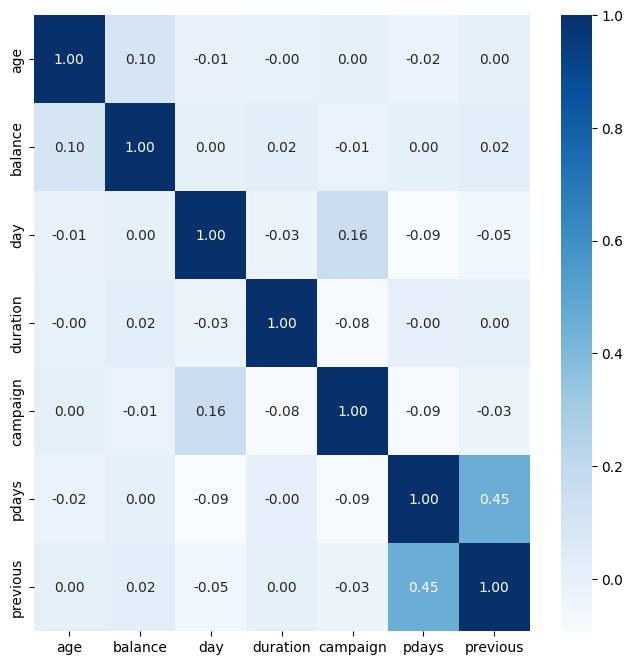

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1500x1500 with 0 Axes>

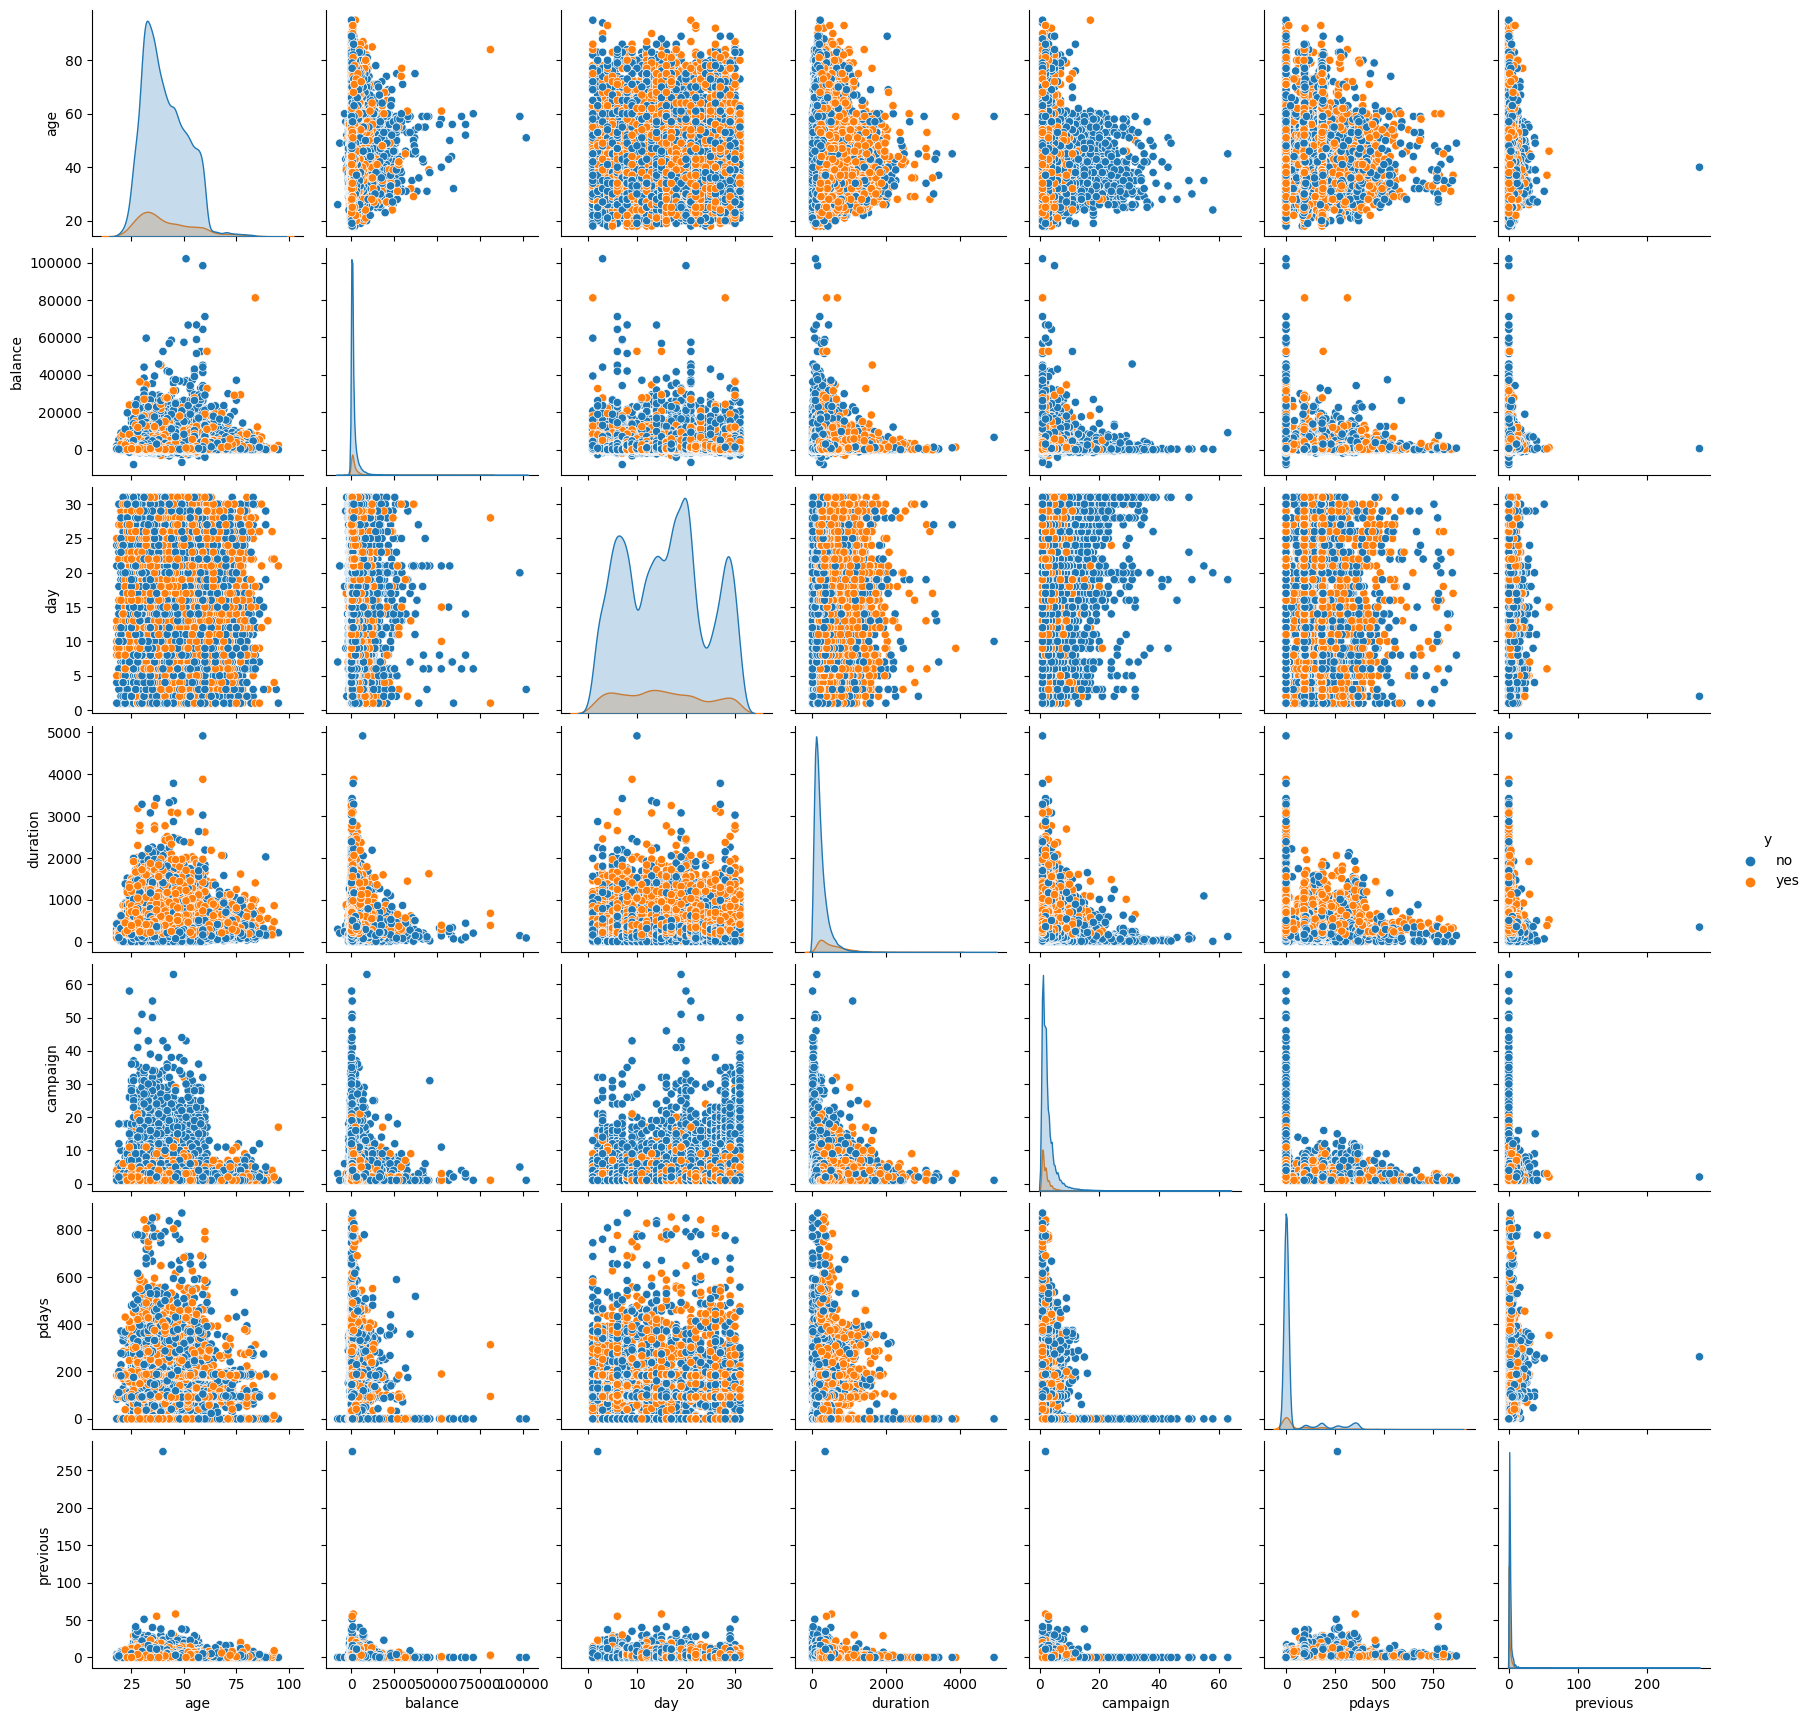

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='y')

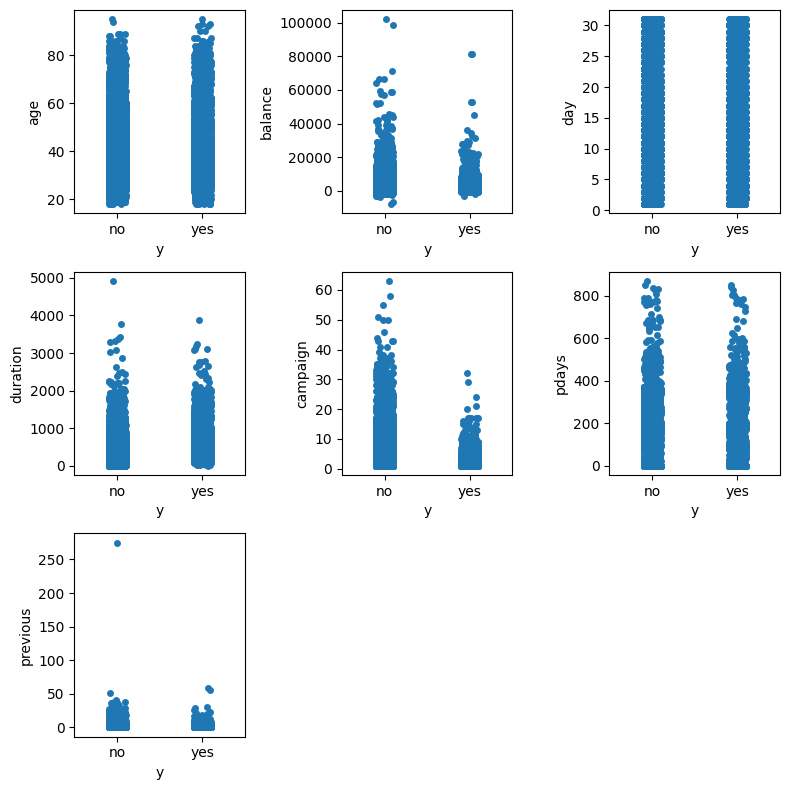

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig = plt.figure(figsize=(8, 8))
for i in range(0, len(num)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='y', y=num[i])
    plt.tight_layout()

for i in range(0, len(num)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='y', y=num[i])
    plt.tight_layout()

# Deskripsi hasil multivariet analysis (data numerikal)

* Pada grafik bagian heatmap, korelasi tiap feature numerical tidak memiliki nilai dengan angka sebesar 0.7 sehingga tidak menyebabkan kesulitan saat melakukan analisis dan prediksi untuk pembuatan model ML. Korelasi dengan nilai positif berada pada kolom pdays&previous yang memiliki nilai korelasi sebesar 0.45. Pada kolom previous yang berisi mengenai nasabah yang sebelumnya pernah dihubungi sebelum promosi dan pdays yang berisikan mengenai berapa hari yang sudah terlewatkan setelah promosi sebelumnya.
* Terlihat banyak feature yang memiliki korelasi dengan nilai 0.0 seperti days&balance, age&campaign maupun kolom korelasi yang lain. Sehingga perlu dipertimbangkan kembali bila dilakukannya heatmap yang telah digabung dengan dataset kategorikal apakah masih terdapat banyak nilai dengan angka sebesar 0.0, maka perlu didiskusikan lebih lanjut apakah sebaiknya beberapa kolom yang berada dalam dataset akan didrop atau tidak.
*Untuk grafik pairplot tidak ada outlier yang begitu menonjol selain pada bagian balance, yang dimana ada nasabah yang memiliki balance yang tinggi dan cukup wajar karena setiap orang memiliki balace yang berbeda-beda.

# ***Business Insight***

In [ ]:
df['customer_id'] = list(range(1, 45212))

In [ ]:
df_grup = df.groupby(['y','loan']).agg({'customer_id' : 'nunique'}).reset_index()
df_grup.columns = ['Respon','Loan','JumlahCustomer']
df_grup

,Respon,Loan,JumlahCustomer
0,no,no,33162
1,no,yes,6760
2,yes,no,4805
3,yes,yes,484


In [ ]:
no = len(df[df['y']=='no'])
yes = len(df[df['y']=='yes'])
denom = [no,no,yes,yes]

In [ ]:
df_grup['Percentage (%)'] = df_grup.JumlahCustomer/denom
df_grup

,Respon,Loan,JumlahCustomer,Percentage (%)
0,no,no,33162,0.830670
1,no,yes,6760,0.169330
2,yes,no,4805,0.908489
3,yes,yes,484,0.091511


Text(0.5, 1.0, 'Persentase Respon Nasabah Berdasarkan Loan"')

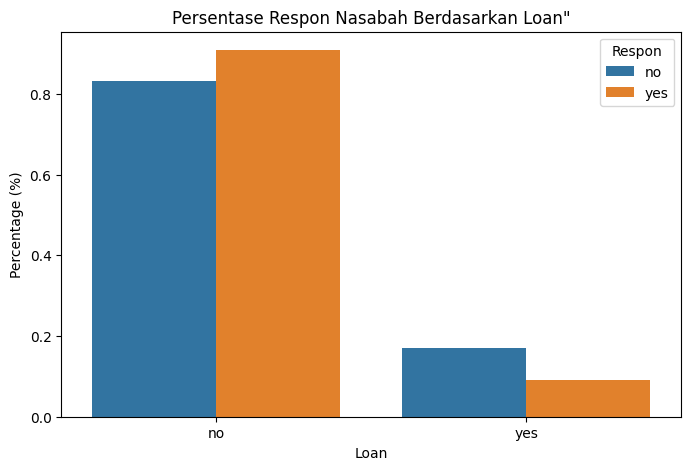

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_grup, x='Loan',y='Percentage (%)',hue='Respon')
plt.title('Persentase Respon Nasabah Berdasarkan Loan"', fontsize=12)

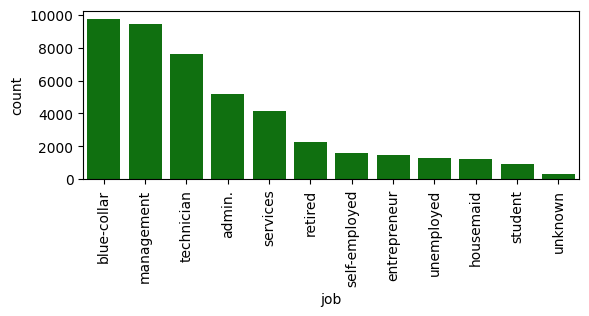

In [ ]:
plt.subplot(2, 1, 1)
sns.countplot(x = df['job'],order=df['job'].value_counts().index ,color = 'green')
plt.xticks(rotation=90)
plt.show()